# Retail Sales Prediction NN

## [Story](https://www.pivotaltracker.com/story/show/187987724)

## [Source](https://medium.com/@iabbasali/big-mart-sales-prediction-using-machine-learning-b92976e53223)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('./datasource/train.csv')
test = pd.read_csv('./datasource/test.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [5]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
# unique values present in each of the columns
for i in train.columns:
    print(f"{i} : {train[i].nunique()}")

Item_Identifier : 1559
Item_Weight : 415
Item_Fat_Content : 5
Item_Visibility : 7880
Item_Type : 16
Item_MRP : 5938
Outlet_Identifier : 10
Outlet_Establishment_Year : 9
Outlet_Size : 3
Outlet_Location_Type : 3
Outlet_Type : 4
Item_Outlet_Sales : 3493


In [10]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
# Each column datatype
for i in train.columns:
    print(f"{i} : {train[i].dtype}")

Item_Identifier : object
Item_Weight : float64
Item_Fat_Content : object
Item_Visibility : float64
Item_Type : object
Item_MRP : float64
Outlet_Identifier : object
Outlet_Establishment_Year : int64
Outlet_Size : object
Outlet_Location_Type : object
Outlet_Type : object
Item_Outlet_Sales : float64


In [12]:
# two lists: 1) column names of categorical columns 2) column names of numerical columns
cat_columns = []
num_columns = []

for i in train.columns:
    if train[i].dtype == object:
        cat_columns.append(i)
    else:
        num_columns.append(i)

In [13]:
cat_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [14]:
num_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

## Fixing Missing Values

In [15]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)
test['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)

In [16]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [18]:
train['Outlet_Size'].mode()[0]

'Medium'

In [19]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)
test['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

In [20]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Data Visualization
### Categorical Data

In [23]:
train[cat_columns].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [24]:
train[cat_columns].nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [25]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

<Axes: ylabel='Item_Fat_Content'>

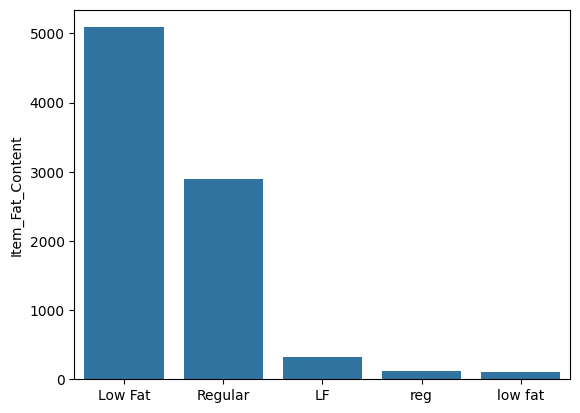

In [28]:
sns.barplot(train['Item_Fat_Content'].value_counts())

In [31]:
# join similar columns: LF and Low Fat, reg and Regular
train['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular', 'Low fat':'Low Fat'}, inplace=True)
test['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular', 'Low fat':'Low Fat'}, inplace=True)

In [33]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<Axes: ylabel='Item_Fat_Content'>

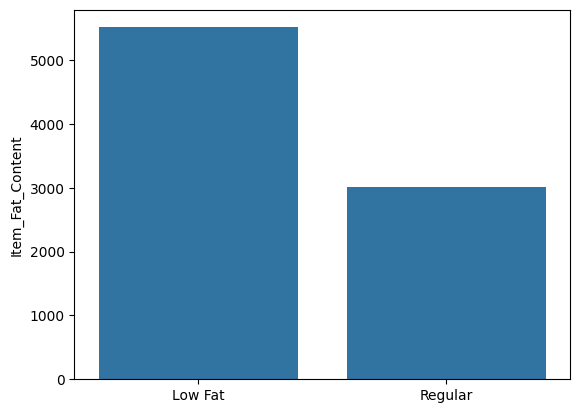

In [34]:
sns.barplot(train['Item_Fat_Content'].value_counts())

<Axes: ylabel='Outlet_Type'>

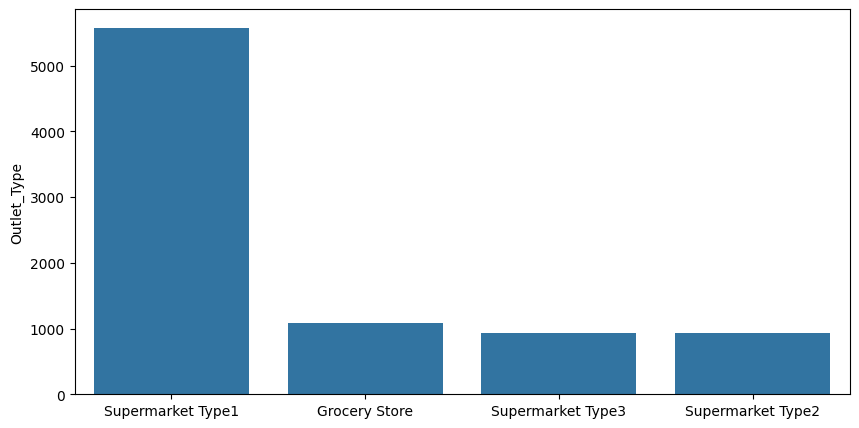

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(train['Outlet_Type'].value_counts())

<Axes: ylabel='Outlet_Location_Type'>

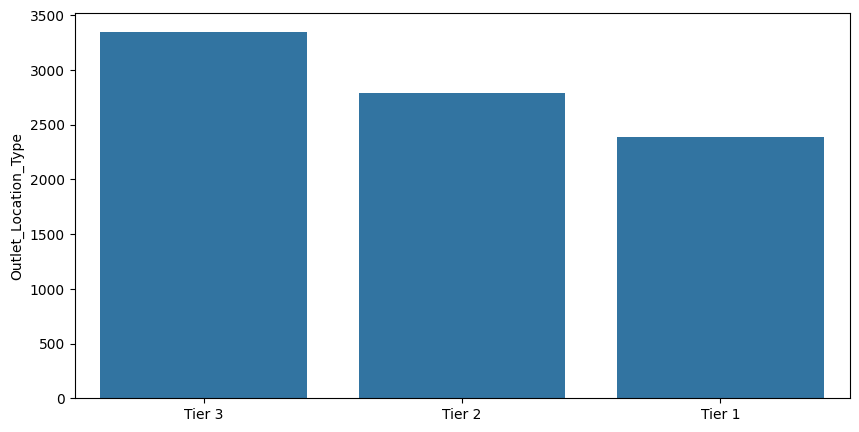

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(train['Outlet_Location_Type'].value_counts())

<Axes: ylabel='Item_Type'>

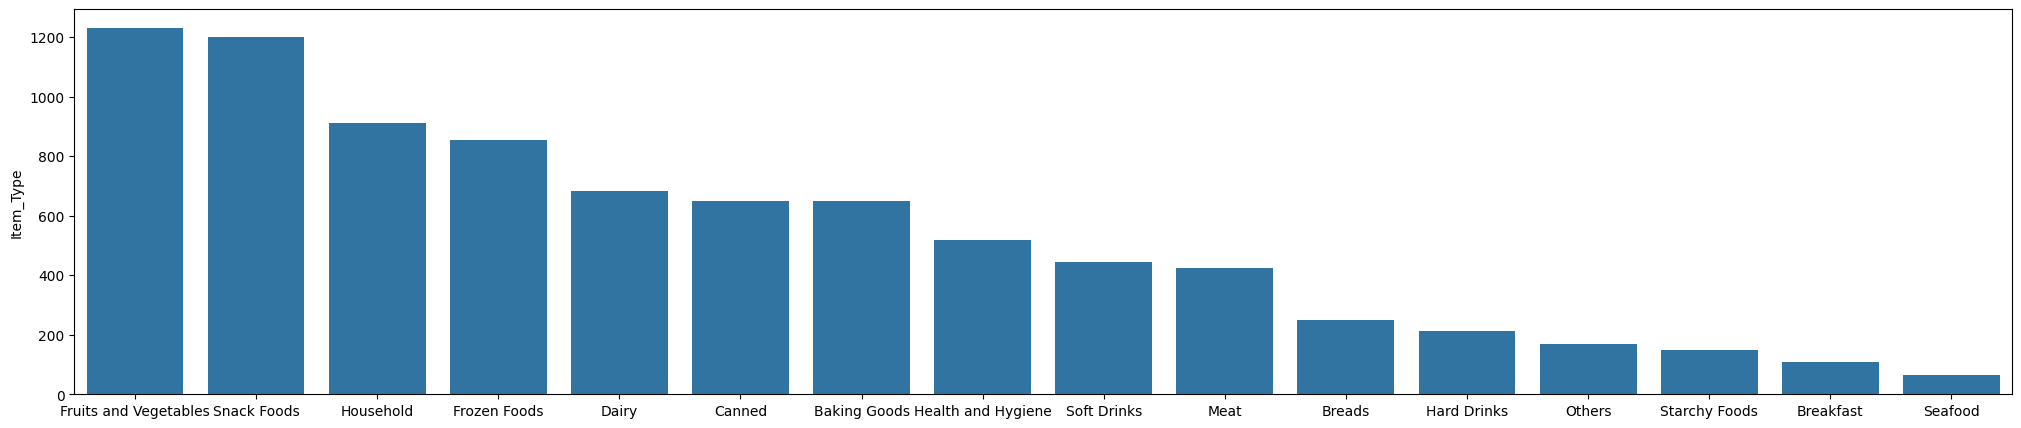

In [39]:
plt.figure(figsize=(25,5))
sns.barplot(train['Item_Type'].value_counts())

<Axes: ylabel='Outlet_Identifier'>

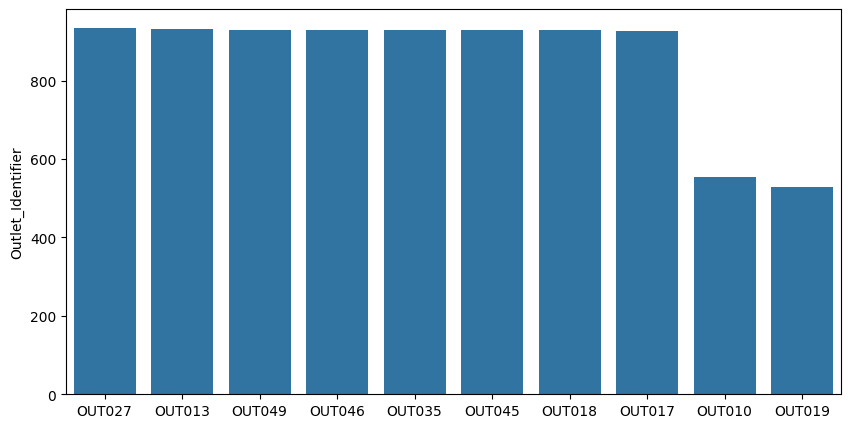

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(train['Outlet_Identifier'].value_counts())

<Axes: ylabel='Outlet_Size'>

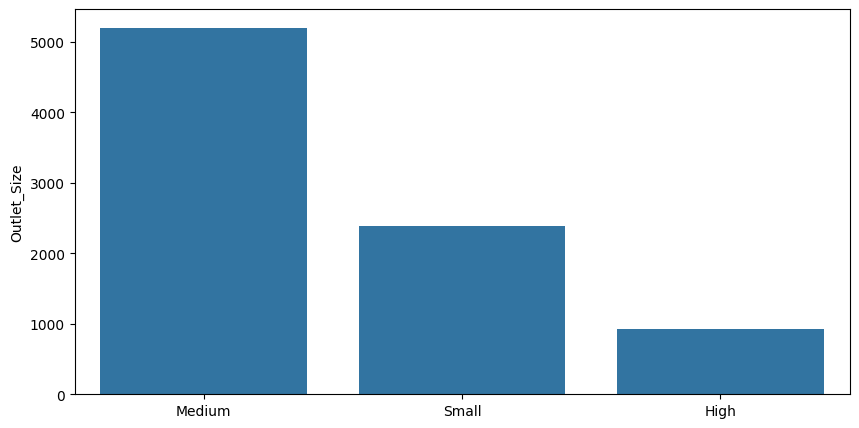

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(train['Outlet_Size'].value_counts())

## Numerical Columns Visualization

In [42]:
train[num_columns]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


<Axes: xlabel='Item_Weight', ylabel='Count'>

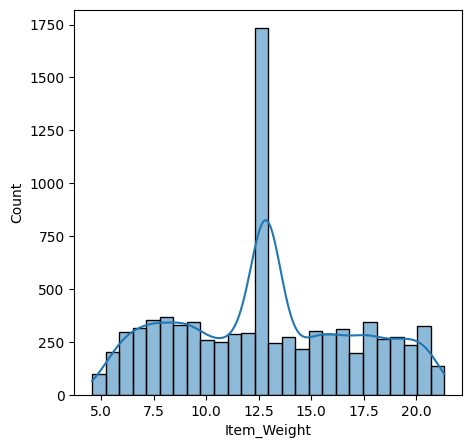

In [43]:
plt.figure(figsize=(5,5))
sns.histplot(train['Item_Weight'], kde=True)

<Axes: xlabel='Item_Visibility', ylabel='Count'>

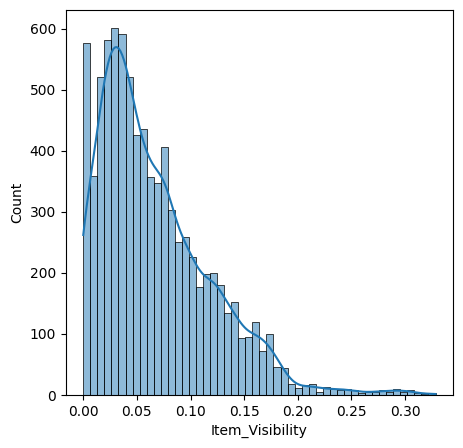

In [44]:
plt.figure(figsize=(5,5))
sns.histplot(train['Item_Visibility'], kde=True)

<Axes: xlabel='Item_MRP', ylabel='Count'>

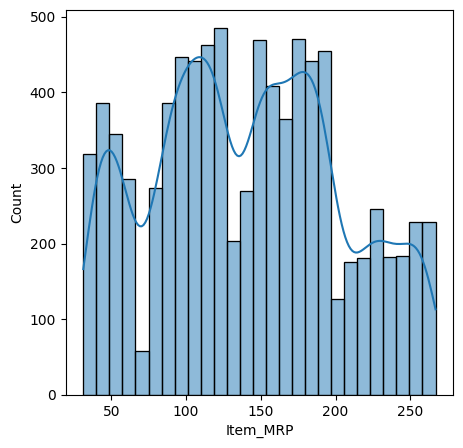

In [46]:
plt.figure(figsize=(5,5))
sns.histplot(train['Item_MRP'], kde=True)

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

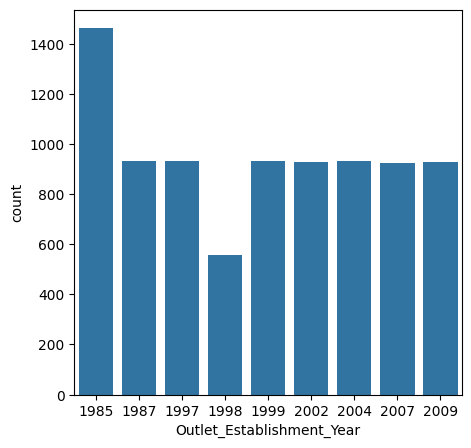

In [49]:
plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Establishment_Year', data=train)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

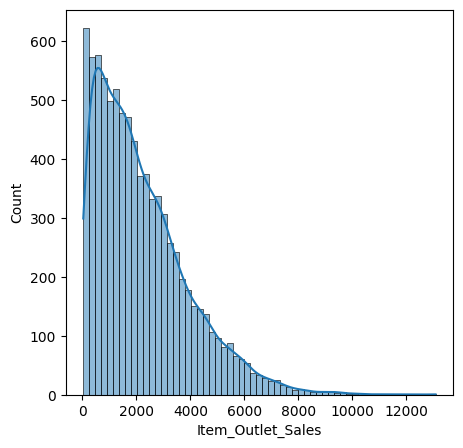

In [50]:
plt.figure(figsize=(5,5))
sns.histplot(train['Item_Outlet_Sales'], kde=True)

## Handling Categorical Values - Missing...

In [53]:
train[cat_columns].nunique()

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [54]:
train[cat_columns]

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [55]:
# reduce the number of unique rows by renaming similars
train['Item_Identifier'] = train['Item_Identifier'].str[:2]
test['Item_Identifier'] = test['Item_Identifier'].str[:2]

In [56]:
train[cat_columns].nunique()

Item_Identifier          3
Item_Fat_Content         2
Item_Type               16
Outlet_Identifier       10
Outlet_Size              3
Outlet_Location_Type     3
Outlet_Type              4
dtype: int64

In [57]:
train[cat_columns].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FD,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DR,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FD,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FD,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NC,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


### Split categorical columns in 2: 1) ordinal columns : Item_Fat_content, Outlet_Size, Outlet_Location_type, 2) Nominal, which do not require order
# Use `Ordinal Encoder` for ordinals and `One-Hot Encoding` fro nominals

In [59]:
ordinal_cat_columns = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']
nominal_cat_columns = ['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type']

In [60]:
# One-Hot encoding using get_dummies()
train = pd.get_dummies(train, columns=nominal_cat_columns)
test = pd.get_dummies(test, columns=nominal_cat_columns)

In [62]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

In [64]:
train[ordinal_cat_columns] = ordinal_encoder.fit_transform(train[ordinal_cat_columns])
test[ordinal_cat_columns] = ordinal_encoder.fit_transform(test[ordinal_cat_columns])

In [65]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Identifier_DR,Item_Identifier_FD,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.0,0.016047,249.8092,1999,1.0,0.0,3735.1380,0,1,...,0,0,0,0,0,1,0,1,0,0
1,5.92,1.0,0.019278,48.2692,2009,1.0,2.0,443.4228,1,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.0,0.016760,141.6180,1999,1.0,0.0,2097.2700,0,1,...,0,0,0,0,0,1,0,1,0,0
3,19.20,1.0,0.000000,182.0950,1998,1.0,2.0,732.3800,0,1,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0.0,0.000000,53.8614,1987,0.0,2.0,994.7052,0,0,...,0,0,0,0,0,0,0,1,0,0


In [66]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Identifier_DR,Item_Identifier_FD,Item_Identifier_NC,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0.0,0.007565,107.8622,1999,1.0,0.0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,8.300000,1.0,0.038428,87.3198,2007,1.0,1.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,14.600000,0.0,0.099575,241.7538,1998,1.0,2.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,7.315000,0.0,0.015388,155.0340,2007,1.0,1.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,12.857645,1.0,0.118599,234.2300,1985,1.0,2.0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


## Train and Test Split

In [67]:
# Use train_test_split() from sklearn
from sklearn.model_selection import train_test_split

In [70]:
# Split
y = train['Item_Outlet_Sales'] # what we are going to predict
X = train.drop(columns=['Item_Outlet_Sales'])

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=786)

## Model Building

### Use `XGBRegressor` Model

In [74]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
model_prediction = model.predict(X_test)

### Model Evaluation

- Mean Absolute Error
- Mean Squared Error
- R2 Score

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_r2_score = r2_score(y_test, model_prediction)
model_mae_score = mean_absolute_error(y_test, model_prediction)
model_mse_score = mean_squared_error(y_test, model_prediction)

In [76]:
print (model_r2_score, model_mae_score, model_mse_score)

0.48053856299386644 816.0667807192451 1423839.1058956727
